In [7]:
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow. keras.models import Model 
from tensorflow. keras import backend as K 

In [8]:
input_img = Input(shape=(28, 28, 1)) 
# adapt this if using `channels_first` image data format 
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img) 
x = MaxPooling2D((2, 2), padding='same')(x) 
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x) 
encoded = MaxPooling2D((2, 2), padding='same')(x) 
# at this point the representation is (7, 7, 32) 
x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded) 
x = UpSampling2D((2, 2))(x) 
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x) 
x = UpSampling2D((2, 2))(x) 
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x) 
autoencoder = Model(input_img, decoded) 
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


In [9]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [10]:
from keras.datasets import mnist 
import numpy as np 
(x_train, _), (x_test, _) = mnist.load_data() 
x_train = x_train.astype('float32') / 255. 
x_test = x_test.astype('float32') / 255. 
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1)) 
# adapt this if using `channels_first` image data format 
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1)) 
# adapt this if using `channels_first` image data format 
noise_factor = 0.5 
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 
x_train_noisy = np.clip(x_train_noisy, 0., 1.) 
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

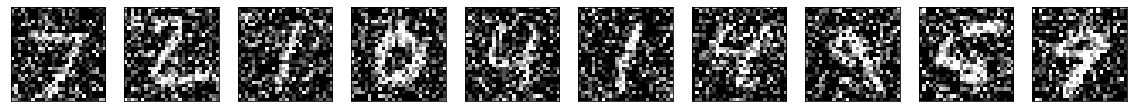

In [11]:
import matplotlib.pyplot as plt
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test_noisy[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
plt.close()

In [12]:
from tensorflow.keras.callbacks import TensorBoard
autoencoder.fit(x_train_noisy, x_train, epochs=50, batch_size=128, shuffle=True,
                validation_data=(x_test_noisy, x_test),
                callbacks=[TensorBoard(log_dir='./tb', histogram_freq=0, write_graph=False)])

Epoch 1/50
469/469 [==============================] - 150s 320ms/step - loss: 0.1645 - val_loss: 0.1164
Epoch 2/50
469/469 [==============================] - 140s 299ms/step - loss: 0.1114 - val_loss: 0.1070
Epoch 3/50
469/469 [==============================] - 148s 315ms/step - loss: 0.1063 - val_loss: 0.1036
Epoch 4/50
469/469 [==============================] - 147s 314ms/step - loss: 0.1039 - val_loss: 0.1019
Epoch 5/50
469/469 [==============================] - 132s 282ms/step - loss: 0.1024 - val_loss: 0.1008
Epoch 6/50
469/469 [==============================] - 132s 282ms/step - loss: 0.1012 - val_loss: 0.0999
Epoch 7/50
469/469 [==============================] - 136s 291ms/step - loss: 0.1003 - val_loss: 0.0994
Epoch 8/50
469/469 [==============================] - 143s 305ms/step - loss: 0.0995 - val_loss: 0.0984
Epoch 9/50
469/469 [==============================] - 147s 313ms/step - loss: 0.0989 - val_loss: 0.0978
Epoch 10/50
469/469 [==============================] - 149s 318m

In [ ]:
!tensorboard --logdir=./tb

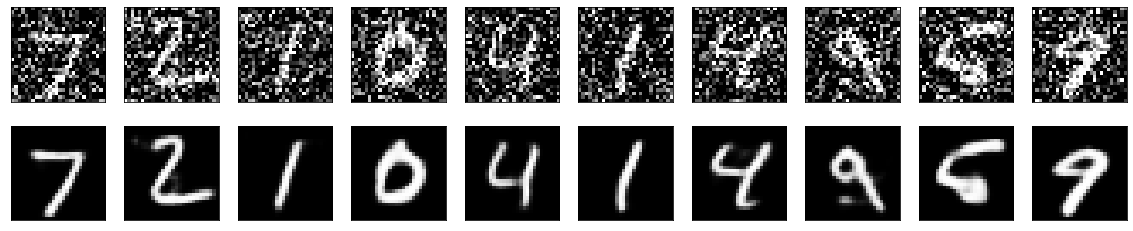

In [13]:
decoded_img = autoencoder.predict(x_test_noisy)
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test_noisy[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_img[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
plt.close()